11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


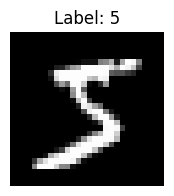

Data loaded and normalized successfully!


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset (automatically downloads if not present)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. Verify data by showing the first image
plt.figure(figsize=(2,2))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

print("Data loaded and normalized successfully!")

In [2]:
# 1. Define the architecture
model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(28, 28)),                # Define input shape correctly
  tf.keras.layers.Flatten(),                      # Convert 2D image to 1D vector
  tf.keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons
  tf.keras.layers.Dropout(0.2),                   # Prevents overfitting
  tf.keras.layers.Dense(10, activation='softmax') # Output layer (10 digits)
])

# 2. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train the model (This is the "learning" phase)
print("Starting training...")
model.fit(x_train, y_train, epochs=5)

Starting training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9148 - loss: 0.2972
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9577 - loss: 0.1432
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9683 - loss: 0.1070
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9737 - loss: 0.0854
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0735


313/313 - 1s - 3ms/step - accuracy: 0.9751 - loss: 0.0767

Final Test Accuracy: 97.51%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


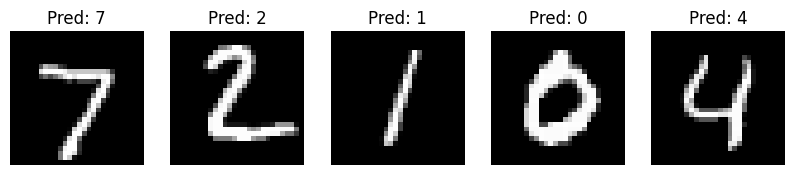

In [3]:
# 1. Evaluate on the test set (data the model has NEVER seen)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'\nFinal Test Accuracy: {test_acc*100:.2f}%')

# 2. Visual Check: Let's see what the model predicts for the first 5 test images
predictions = model.predict(x_test[:5])

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()